<a href="https://www.kaggle.com/code/quangnhatbui/football-players-visualization?scriptVersionId=139534070" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
import warnings
import openai
from sklearn.decomposition import PCA

# Feature choosing

Feature description

In [3]:
acronyms = {"Rk": "Rank", "Player": "Player's name", "Nation": "Player's nation", "Pos": "Position",
            "Squad": "Squad’s name", "Comp": "League that squat occupies", "Age": "Player's age",
            "Born": "Year of birth", "MP": "Matches played", "Starts": "Matches started",
            "Min": "Minutes played", "90s": "Minutes played divided by 90", 
            "Goals": "Goals scored or allowed", 
            "Shots": "Shots total (Does not include penalty kicks)", 
            "SoT": "Shots on target (Does not include penalty kicks)", 
            'SoT%': 'Shots on target percentage (Does not include penalty kicks)',
            'G/Sh': 'Goals per shot', 
            'G/SoT': 'Goals per shot on target (Does not include penalty kicks)', 
            'ShoDist': 'Average distance, in yards, from goal of all shots taken (Does not include penalty kicks)',
            'ShoFK': 'Shots from free kicks', 
            'ShoPK': 'Penalty kicks made',
            "PasProg":"Completed passes that move the ball towards the opponent's goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area",
                  "PasAtt":"Passes attempted",
                  "PasLive":"Live-ball passes",
                  "PasDead":"Dead-ball passes",
                  "PasFK":"Passes attempted from free kicks",
                  "TB":"Completed pass sent between back defenders into open space",
                  "Sw":"Passes that travel more than 40 yards of the width of the pitch",
                  "PasCrs":"Crosses",
                  "TI":"Throw-Ins taken",
                  "CK":"Corner kicks",
                  "CkIn":"Inswinging corner kicks",
                  "CkOut":"Outswinging corner kicks",
                  "CkStr":"Straight corner kicks",
                  "PasCmp":"Passes completed",
                  "PasOff":"Offsides",
                  "PasBlocks":"Blocked by the opponent who was standing it the path",
                  "SCA":"Shot-creating actions",
                  "ScaPassLive":"Completed live-ball passes that lead to a shot attempt",
                  "ScaPassDead":"Completed dead-ball passes that lead to a shot attempt",
                  "ScaDrib":"Successful dribbles that lead to a shot attempt",
                  "ScaSh":"Shots that lead to another shot attempt",
                  "ScaFld":"Fouls drawn that lead to a shot attempt",
                  "ScaDef":"Defensive actions that lead to a shot attempt",
                  "GCA":"Goal-creating actions",
                  "GcaPassLive":"Completed live-ball passes that lead to a goal",
                  "GcaPassDead":"Completed dead-ball passes that lead to a goal",
                  "GcaDrib":"Successful dribbles that lead to a goal",
                  "GcaSh":"Shots that lead to another goal-scoring shot",
                  "GcaFld":"Fouls drawn that lead to a goal",
                  "GcaDef":"Defensive actions that lead to a goal",
                  "Tkl":"Number of players tackled",
                  "TklWon":"Tackles in which the tackler's team won possession of the ball",
                  "TklDef3rd":"Tackles in defensive 1/3",
                  "TklMid3rd":"Tackles in middle 1/3",
                  "TklAtt3rd":"Tackles in attacking 1/3",
                  "TklDri":"Number of dribblers tackled",
                  "TklDriAtt":"Number of times dribbled past plus number of tackles",
                  "TklDri%":"Percentage of dribblers tackled",
                  "TklDriPast":"Number of times dribbled past by an opposing player",
                  "Blocks":'Number of times blocking the ball by standing in its path',
                 'BlkSh':'Number of times blocking a shot by standing in its path',
            'PKatt': 'Penalty kicks attempted', 
            'PasTotCmp': 'Passes completed', 
            'PasTotAtt': 'Passes attempted', 
            'PasTotCmp%': 'Pass completion percentage', 
            'PasTotDist': 'Total distance, in yards, that completed passes have traveled in any direction',
            'PasTotPrgDist': 'Total distance, in yards, that completed passes have traveled towards the opponent\'s goal',
            'PasShoCmp': 'Passes completed (Passes between 5 and 15 yards)', 
            'PasShoAtt': 'Passes attempted (Passes between 5 and 15 yards)', 
            'PasShoCmp%': 'Pass completion percentage (Passes between 5 and 15 yards)',
            'PasMedCmp': 'Passes completed (Passes between 15 and 30 yards)', 
            'PasMedAtt': 'Passes attempted (Passes between 15 and 30 yards)', 
            'PasMedCmp%': 'Pass completion percentage (Passes between 15 and 30 yards)',
            'PasLonCmp': 'Passes completed (Passes longer than 30 yards)', 
            'PasLonAtt': 'Passes attempted (Passes longer than 30 yards)', 
            'PasLonCmp%': 'Pass completion percentage (Passes longer than 30 yards)',
            'Assists': 'Assists', 
            'PasAss': 'Passes that directly lead to a shot (assisted shots)', 
            'Pas3rd': 'Completed passes that enter the 1/3 of the pitch closest to the goal',
             "PPA" : "Completed passes into the 18-yard box",
            "CrsPA" : "Completed crosses into the 18-yard box",
           "BlkPass":"Number of times blocking a pass by standing in its path",
                  "Int":"Interceptions",
                  "Tkl+Int":"Number of players tackled plus number of interceptions",
                  "Clr":"Clearances",
                  "Err":"Mistakes leading to an opponent's shot",
                  "Touches":"Number of times a player touched the ball. Note: Receiving a pass, then dribbling, then sending a pass counts as one touch",
                  "TouDefPen":"Touches in defensive penalty area",
                  "TouDef3rd":"Touches in defensive 1/3",
                  "TouMid3rd":"Touches in middle 1/3",
                  "TouAtt3rd":"Touches in attacking 1/3",
                  "TouAttPen":"Touches in attacking penalty area",
                  "TouLive":"Live-ball touches. Does not include corner kicks, free kicks, throw-ins, kick-offs, goal kicks or penalty kicks.",
                  "ToAtt":"Number of attempts to take on defenders while dribbling",
                  "ToSuc":"Number of defenders taken on successfully, by dribbling past them",
                  "ToSuc%":"Percentage of take-ons Completed Successfully",
                  "ToTkl":"Number of times tackled by a defender during a take-on attempt",
                  "ToTkl%":"Percentage of time tackled by a defender during a take-on attempt",
                  "Carries":"Number of times the player controlled the ball with their feet",
                  "CarTotDist":"Total distance, in yards, a player moved the ball while controlling it with their feet, in any direction",
                  "CarPrgDist":"Total distance, in yards, a player moved the ball while controlling it with their feet towards the opponent's goal",
                  "CarProg":"Carries that move the ball towards the opponent's goal at least 5 yards, or any carry into the penalty area",
                  "Car3rd":"Carries that enter the 1/3 of the pitch closest to the goal",
                  "CPA":"Carries into the 18-yard box",
                  "CarMis":"Number of times a player failed when attempting to gain control of a ball",
                  "CarDis":"Number of times a player loses control of the ball after being tackled by an opposing player",
                  "Rec":"Number of times a player successfully received a pass",
           "RecProg" : 
            "Completed passes that move the ball towards the opponents goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area Make this a dictionary",
           "CrdY":"Yellow cards",
                  "CrdR":"Red cards",
                  "2CrdY":"Second yellow card",
                  "Fls":"Fouls committed",
                  "Fld":"Fouls drawn",
                  "Off":"Offsides",
                  "Crs":"Crosses",
                  "TklW":"Tackles in which the tackler's team won possession of the ball",
                  "PKwon":"Penalty kicks won",
                  "PKcon":"Penalty kicks conceded",
                  "OG":"Own goals",
                  "Recov":"Number of loose balls recovered",
                  "AerWon":"Aerials won",
                  "AerLost":"Aerials lost",
                  "AerWon%":"Percentage of aerials won",
           }


In [4]:
general_info = ["Player", "Nation", "Pos", "Squad", "Age", "Born"]
playing_time = ["MP", "Starts", "Min"]
goals_info = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "ShoPK", "PKatt", "GCA", 
              "SCA", "Off", "PKwon", "PKcon"]

passes_info = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Assists", 
               "PasAss", "Pas3rd", "PPA", "PasCrs", "CrsPA", "PasAtt", "PasLive", "PasDead", "PasOff",
              "PasBlocks", "Crs"]
skill_info = ["SCA", "ScaDrib", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", "Car3rd", 'CPA', "CarMis", "CarDis", "Fld"]
defense_info = ["Tkl", "TklWon", "TklDri", "Blocks", "Int", "Clr", "Err", "CrdY", "CrdR", "Fls", "OG", "Recov", "AerWon", 
             "AerLost"]

In [5]:
goals_bestfeatures = ["Goals", "Shots", "SoT"]
passes_bestfeatures = ["PasTotCmp", "Assists"]
skill_bestfeatures = ["SCA", "ScaDrib"]
defense_bestfeatures = ["Tkl", "Int"]

In [6]:
forward_features = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "Assists",
                    "ScaPassLive", "Car3rd", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis"]
midfielder_features = ["Goals","PasTotCmp", "PasTotCmp%", "PasTotDist", "PasTotPrgDist", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp", 
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive", 
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", 
                       "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", "BlkSh", "Int", "Recov", "Carries", "CarTotDist", "CarPrgDist" , "Fld"]
defender_features = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks", 
                     "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon", "AerLost", "Carries", "CarTotDist", "CarPrgDist", "CrdY", "CrdR","Fls", "Clr"]

features_sum = ["Goals", "MP", "Starts", "Min", "Assists"]

I use make the reduced features to prevent potential curse of dimensionality

In [7]:
forward_features_reduced = ["Goals", "Shots", "SCA", "Assists", "Car3rd", "ScaFld", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "ScaDrib"]
midfielder_features_reduced = ["Goals","PasTotCmp", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp", "SCA", "ScaDrib", "GCA", "Tkl", "TklWon", "TklDri", 
                       "TklDriAtt", "Blocks", "BlkSh", "Int", "Recov", "Carries", "CarPrgDist" , "Fld"]
defender_features_reduced = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks", 
                     "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon", "AerLost", "Carries", "CarTotDist", "CarPrgDist", "CrdY", "CrdR","Fls", "Clr"]

In [8]:
forward_position = ["FW", "FWMF", "FWDF"]
midfield_position = ["MF", "MFDF", "MFFW"]
defender_position = ["DF", "DFMF", "DFFW"]
positions = forward_position + midfield_position + defender_position

In [9]:
# forward_features_sum = ["Goals", "Shots", "SoT", "PKatt", "GCA", "SCA", "Off", "PKwon", "ScaDrib", 
#                     "ScaPassLive", "Car3rd", "Fld",  "ScaPassLive", "Car3rd"]
# forward_features_max = ["G/Sh", "G/SoT", "ShoDist"]
# midfielder_features_sum = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp", 
#                        "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive", 
#                        "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", 
#                        "TklDriAtt", "TklDriPast", "Blocks", "BlkSh", "Int", "Recov"]
# midfielder_features_max = ["PasTotCmp%", "TklDri%"]
# defender_features_sum = ["Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", 
#                      "BlkSh", "Int", "Recov", "AerWon", "AerLost", "AerWon%"]
# defender_features_max = ["AerWon%"]

# Data preprocessing

Making sure that each player will only have 1 entry.

In [10]:
df_2022 = pd.read_csv("/kaggle/input/20222023-football-player-stats/2022-2023 Football Player Stats.csv", encoding='ISO-8859-1', delimiter=';')

Remove goalkeepers

In [11]:
df_2022 = df_2022[df_2022["Pos"] != "GK"]
df_2022.drop(["Rk"], axis=1, inplace=True)

In [12]:
def player_unify(df):
    
    all_players = list(df["Player"].values)
    columns = list(df.columns)
    
    playercnt_dict = {}
    for i in range(len(all_players)):
        if all_players[i] not in playercnt_dict.keys():
            playercnt_dict[all_players[i]] = 1
        else:
            playercnt_dict[all_players[i]] += 1
            
    player_switchclub = []
    for x in playercnt_dict.keys():
        if playercnt_dict[x] >= 2:
            player_switchclub.append(x)
            
    player_new_dict = {}
    df_result = df
    for i in range(len(player_switchclub)):
        player_new = []
        player_old = df[df["Player"] == player_switchclub[i]].values
        for j in range(len(columns)):
            if columns[j] == "Squad":
                new_input = []
                for k in range(player_old.shape[0]):
                    new_input.append(player_old[k, j])
                player_new.append(new_input)
            elif columns[j] == "Squad":
                new_input = ""
                for k in range(player_old.shape[0]):
                    new_input += player_old[k, j]
                    new_input += "/"
                player_new.append(new_input)
            elif columns[j] in features_sum:
                new_input = 0
                for k in range(player_old.shape[0]):
                    new_input += player_old[k, j]
                player_new.append(new_input)
            elif columns[j] in forward_features + midfielder_features + defender_features:
                new_input = 0
                for k in range(player_old.shape[0]):
                    new_input += player_old[k, j]
                new_input /= player_old.shape[0]
                player_new.append(new_input)
            else:
                player_new.append(player_old[0, j])
        player_new_dict[player_switchclub[i]] = player_new
        df_result = df_result.drop(df_result[df_result['Player'] == player_switchclub[i]].index)
    df_unify = pd.DataFrame(player_new_dict)
    df_unify = df_unify.transpose().reset_index(drop=True)
    df_unify.columns = columns
    df_result = pd.concat([df_result, df_unify], axis=0)
    
    return df_result, player_switchclub

In [13]:
df_players, player_switchclub = player_unify(df_2022)
df_players = df_players.reset_index()
df_players.drop("index", axis=1, inplace=True)

Scale that dataframe to model and compare between each player easier

In [14]:
scaler = MinMaxScaler()
df_radar = scaler.fit_transform(df_players[np.unique(playing_time + forward_features + midfielder_features + defender_features)])
df_radar = pd.DataFrame(df_radar)
df_radar.columns = np.unique(playing_time + forward_features + midfielder_features + defender_features)
df_2022.reset_index(drop=True, inplace=True)
df_radar.reset_index(drop=True, inplace=True)
df_radar = pd.concat([df_players[["Player", "Pos", "Comp"]], df_radar], axis=1)

In [15]:
all_players = list(df_radar["Player"].values)
all_leagues = list(np.unique(df_radar["Comp"].values))
all_positions = list(np.unique(df_radar["Pos"].values))

The reason for the following step will be explain in EDA section

In [16]:
position_dict = {
    "FW": "FW",
    "FWMF":"FW",
    "FWDF":"FW",
    "MF":"MF",
    "MFFW":"MF",
    "MFDF":"MF",
    "DF":"DF",
    "DFMF":"DF",
    "DFFW":"DF",
}
df_player_positions = list(df_players["Pos"])
df_radar_player_positions = list(df_radar["Pos"])
position_mapping_players = []
position_mapping_radar = []
for i in range(len(df_player_positions)):
    position_mapping_players.append(position_dict[df_player_positions[i]])

for i in range(len(df_radar_player_positions)):
    position_mapping_radar.append(position_dict[df_radar_player_positions[i]])
    
df_players["Position Category"] = position_mapping_players
df_radar["Position Category"] = position_mapping_radar

In order to prevent the potential curse of dimensionality, I am going to do dimensionality reduction. from the heat map I plot below, I will choose the full features instead of the reduced version. 

In [17]:
pca = PCA(n_components=6)
df_radar_pca = pca.fit_transform(df_radar[forward_features + midfielder_features + defender_features])
print(np.round(pca.explained_variance_ratio_ * 100))
df_radar_pca = pd.DataFrame(df_radar_pca)
df_radar_pca.reset_index(inplace=True, drop=True)
df_radar.reset_index(inplace=True, drop=True)
df_radar_pca = pd.concat([df_radar_pca, df_radar[["Pos", "Position Category", "Player"]]], axis=1)

[20. 14. 13.  8.  6.  4.]


A lot of players doesn't play much so I will separate them from the dataset and treat them as outliers. A season typically have around 30+ matches, so I will pick 8 as the minimum amount of games you have to play.

In [18]:
df_outliers = df_players[df_players["MP"] < 8]
outlier_players = list(df_outliers["Player"].values)
df_outliers_radar = df_radar[df_radar["Player"].isin(outlier_players)]
df_players = df_players[~df_players["Player"].isin(outlier_players)]
df_radar = df_radar[~df_radar["Player"].isin(outlier_players)]

# EDA

In [19]:
print(df_players.shape)

(1731, 124)


In [20]:
df_players.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731 entries, 0 to 2369
Data columns (total 124 columns):
 #    Column             Dtype 
---   ------             ----- 
 0    Player             object
 1    Nation             object
 2    Pos                object
 3    Squad              object
 4    Comp               object
 5    Age                object
 6    Born               object
 7    MP                 object
 8    Starts             object
 9    Min                object
 10   90s                object
 11   Goals              object
 12   Shots              object
 13   SoT                object
 14   SoT%               object
 15   G/Sh               object
 16   G/SoT              object
 17   ShoDist            object
 18   ShoFK              object
 19   ShoPK              object
 20   PKatt              object
 21   PasTotCmp          object
 22   PasTotAtt          object
 23   PasTotCmp%         object
 24   PasTotDist         object
 25   PasTotPrgDist      obj

In [21]:
position_list = forward_features + midfielder_features + defender_features
for i in range(len(position_list)):
    df_players[position_list[i]] = df_players[position_list[i]].astype(int)

In [22]:
print(df_players[forward_features].describe().transpose())

              count        mean        std  min    25%    50%    75%    max
Goals        1731.0    1.559792   2.354010  0.0    0.0    1.0    2.0   25.0
Shots        1731.0    0.877527   1.032432  0.0    0.0    1.0    1.0    6.0
SoT          1731.0    0.125939   0.371332  0.0    0.0    0.0    0.0    5.0
G/Sh         1731.0    0.001733   0.041606  0.0    0.0    0.0    0.0    1.0
G/SoT        1731.0    0.045061   0.207497  0.0    0.0    0.0    0.0    1.0
ShoDist      1731.0   16.780474   5.746805  0.0   13.0   17.0   20.0   37.0
GCA          1731.0    0.012709   0.121931  0.0    0.0    0.0    0.0    2.0
SCA          1731.0    1.753322   1.354860  0.0    1.0    2.0    3.0    9.0
Off          1731.0    0.036395   0.205005  0.0    0.0    0.0    0.0    2.0
PKwon        1731.0    0.000000   0.000000  0.0    0.0    0.0    0.0    0.0
ScaDrib      1731.0    0.006932   0.101767  0.0    0.0    0.0    0.0    2.0
Assists      1731.0    0.001733   0.041606  0.0    0.0    0.0    0.0    1.0
ScaPassLive 

In [23]:
print(df_players[defender_features].describe().transpose())

                count        mean         std  min    25%    50%    75%  \
PasTotCmp      1731.0   34.168111   14.956509  0.0   23.0   33.0   44.0   
PasTotDist     1731.0  583.762565  291.260725  0.0  362.5  564.0  769.0   
PasTotPrgDist  1731.0  184.937031  110.646190  0.0   93.0  175.0  262.0   
Tkl            1731.0    1.244367    1.010246  0.0    1.0    1.0    2.0   
TklWon         1731.0    0.511265    0.649824  0.0    0.0    0.0    1.0   
TklDef3rd      1731.0    0.377816    0.590340  0.0    0.0    0.0    1.0   
TklMid3rd      1731.0    0.229347    0.486790  0.0    0.0    0.0    0.0   
TklAtt3rd      1731.0    0.012709    0.126583  0.0    0.0    0.0    0.0   
TklDri         1731.0    0.317735    0.532876  0.0    0.0    0.0    1.0   
TklDriAtt      1731.0    0.961294    0.878914  0.0    0.0    1.0    1.0   
TklDriPast     1731.0    0.232236    0.475189  0.0    0.0    0.0    0.0   
Blocks         1731.0    0.637782    0.623198  0.0    0.0    1.0    1.0   
BlkSh          1731.0    

In [24]:
print(df_players[midfielder_features].describe().transpose())

                count        mean         std  min    25%    50%    75%  \
Goals          1731.0    1.559792    2.354010  0.0    0.0    1.0    2.0   
PasTotCmp      1731.0   34.168111   14.956509  0.0   23.0   33.0   44.0   
PasTotCmp%     1731.0   76.284806    8.876500  0.0   71.0   77.0   82.5   
PasTotDist     1731.0  583.762565  291.260725  0.0  362.5  564.0  769.0   
PasTotPrgDist  1731.0  184.937031  110.646190  0.0   93.0  175.0  262.0   
Assists        1731.0    0.001733    0.041606  0.0    0.0    0.0    0.0   
PasAss         1731.0    0.498556    0.702080  0.0    0.0    0.0    1.0   
Pas3rd         1731.0    2.339110    1.795940  0.0    1.0    2.0    3.0   
Crs            1731.0    1.375505    1.902527  0.0    0.0    1.0    2.0   
PasCmp         1731.0   34.168111   14.956509  0.0   23.0   33.0   44.0   
PasOff         1731.0    0.005199    0.079570  0.0    0.0    0.0    0.0   
PasBlocks      1731.0    0.478336    0.633340  0.0    0.0    0.0    1.0   
SCA            1731.0    

Many features have really high maximum and low minimum while quantiles are mostly 0s. This could means there are still many outliers in the dataset.

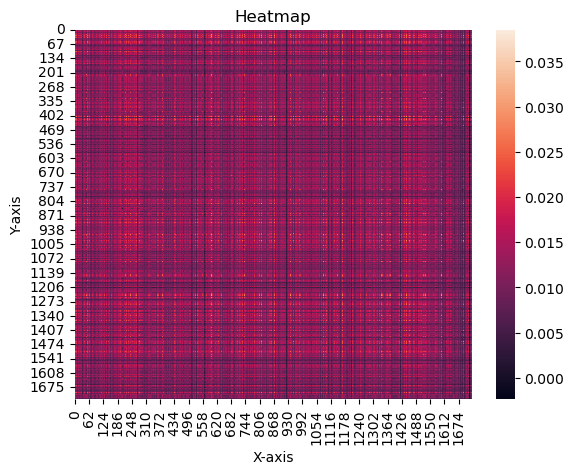

In [25]:
cov_matrix = np.cov(df_radar[forward_features + midfielder_features + defender_features])
sns.heatmap(cov_matrix)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Heatmap")
plt.show()

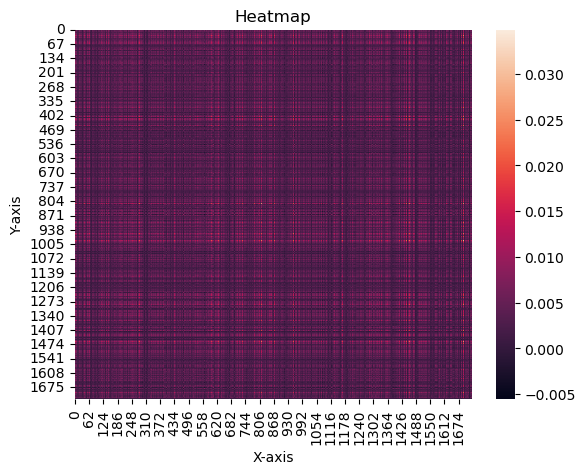

In [26]:
cov_matrix = np.cov(df_radar[forward_features_reduced + midfielder_features_reduced + defender_features_reduced])
sns.heatmap(cov_matrix)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Heatmap")
plt.show()

In [27]:
def plot_position(general_position, features, df, max_value):
    fig, axes = plt.subplots(nrows=1, ncols=len(general_position), figsize=(30,5))
    for i in range(len(general_position)):
        data = df[df["Pos"]==general_position[i]][features].mean()
        data_dict = dict(data)
        data = pd.DataFrame.from_dict(data_dict, orient='index', columns=['Mean Value'])
        axes[i].bar(data.index, data['Mean Value'])
        axes[i].set_xticks(range(len(data)))
        axes[i].set_xticklabels(data.index, rotation=90)
        axes[i].set_title(general_position[i])
        axes[i].set_yticks(np.arange(0, max_value + 0.1, 0.1))
    plt.show()

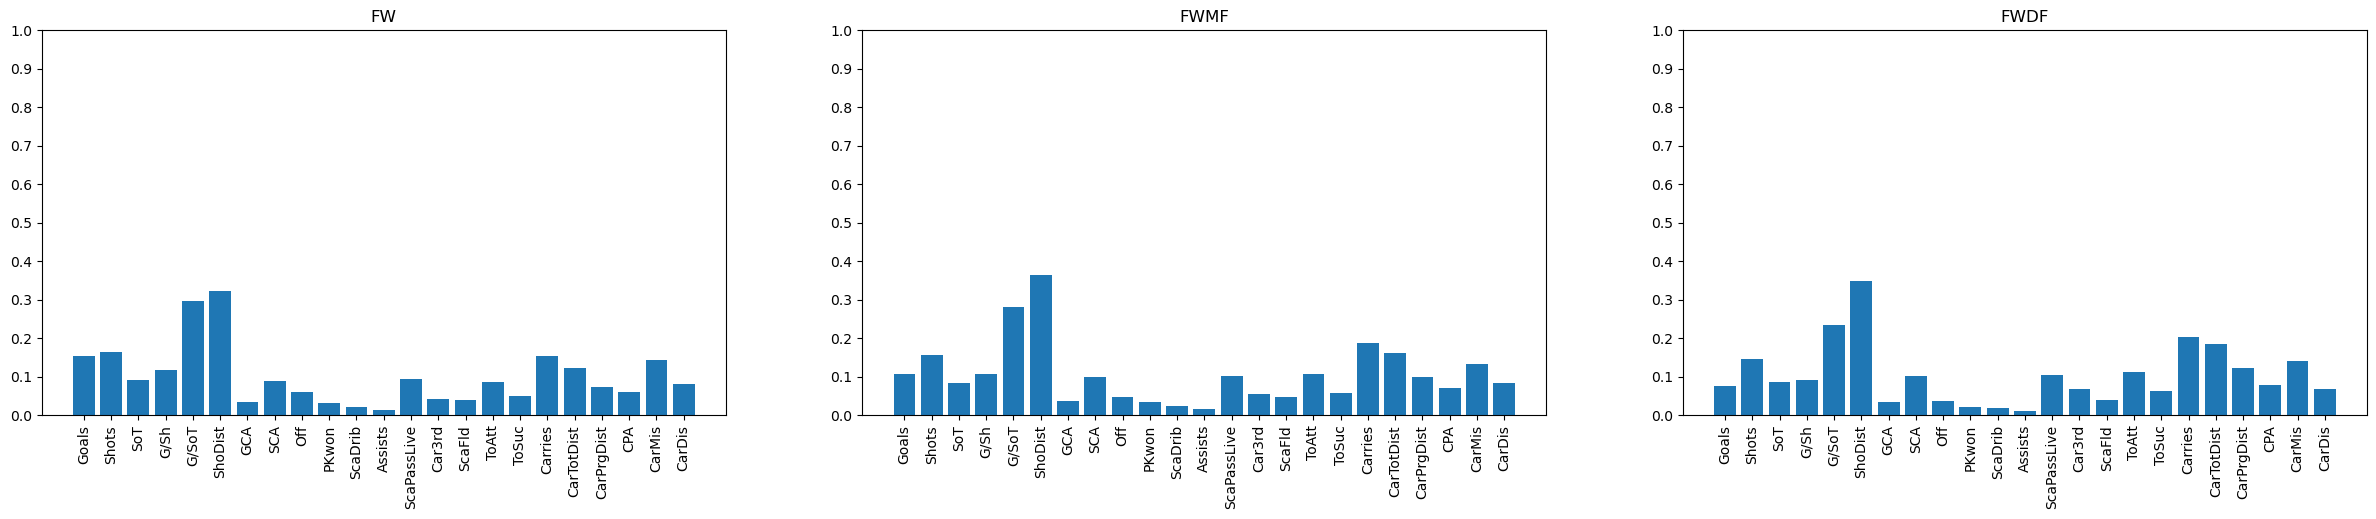

(266, 68)
(176, 68)
(17, 68)


In [28]:
plot_position(forward_position, forward_features, df_radar, 1)
print(df_radar[df_radar["Pos"]=="FW"].shape)
print(df_radar[df_radar["Pos"]=="FWMF"].shape)
print(df_radar[df_radar["Pos"]=="FWDF"].shape)

From this, we can see that each of the forward positions have very similar distribution of the stats. Notably, FW tends to score more goals compare to the other 2 positions due to the fact that the other 2 positions are mix between forward and midfield and especially FWDF which is more of a defensive role than FWMF. Also notice FWMF create more scoring change and shoot from longer distance as expected from the position name.

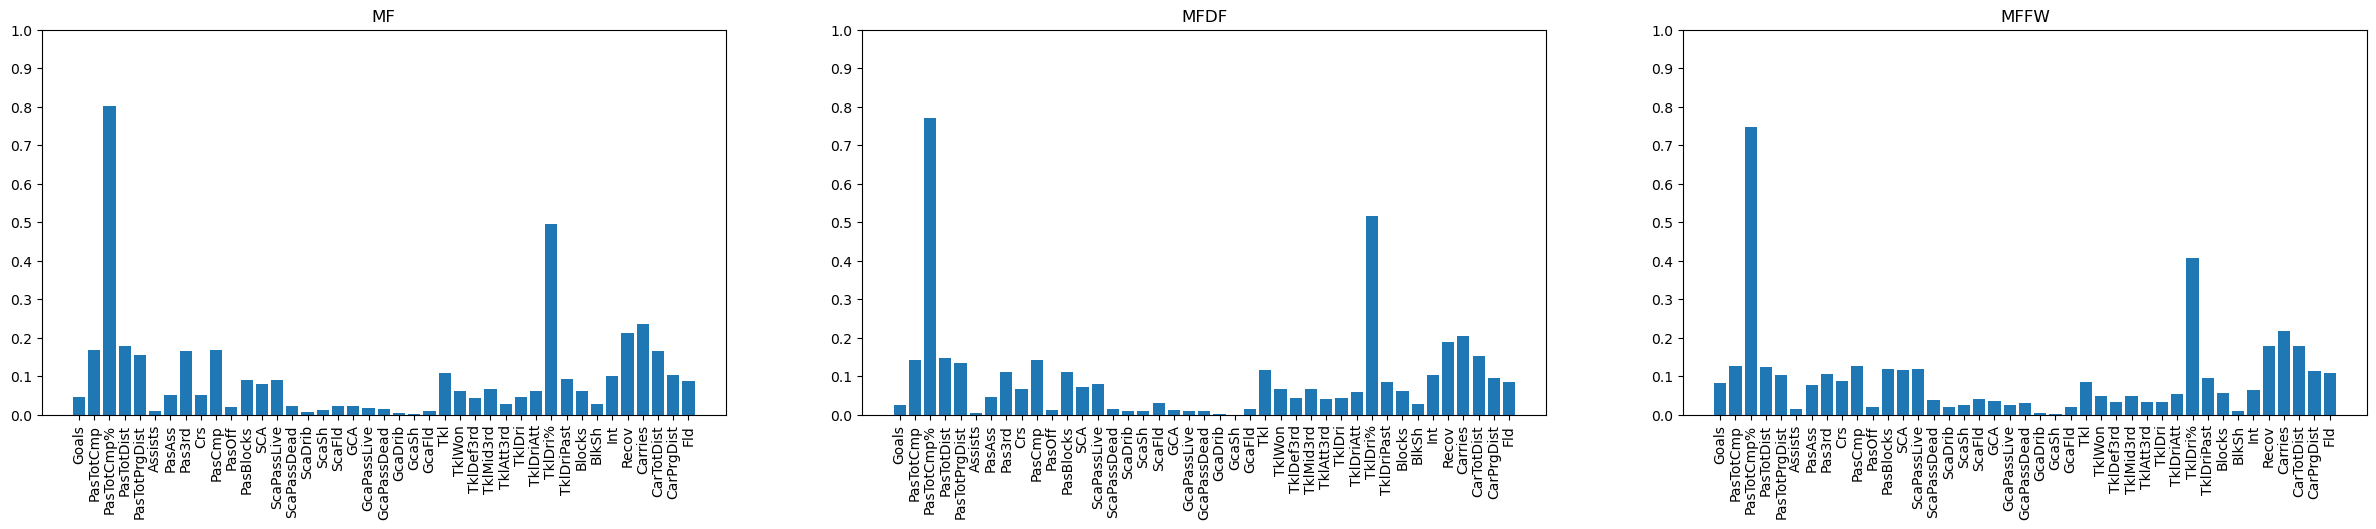

(413, 68)
(42, 68)
(152, 68)


In [29]:
plot_position(midfield_position, midfielder_features, df_radar, 1)
print(df_radar[df_radar["Pos"]=="MF"].shape)
print(df_radar[df_radar["Pos"]=="MFDF"].shape)
print(df_radar[df_radar["Pos"]=="MFFW"].shape)

Nothing too special here as all of these positions looks very similar

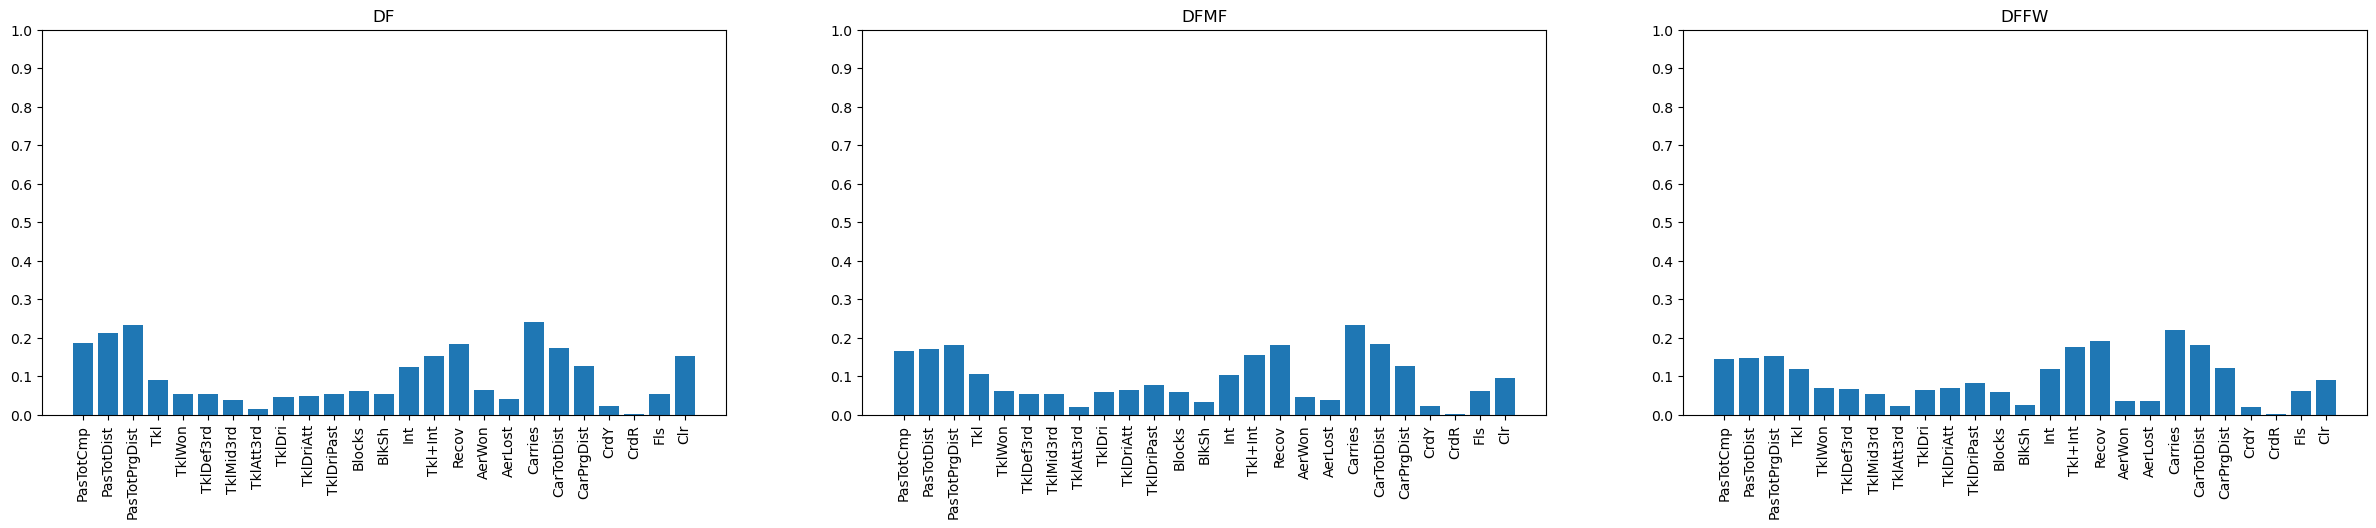

(573, 68)
(68, 68)
(24, 68)


In [30]:
plot_position(defender_position, defender_features, df_radar, 1)
print(df_radar[df_radar["Pos"]=="DF"].shape)
print(df_radar[df_radar["Pos"]=="DFMF"].shape)
print(df_radar[df_radar["Pos"]=="DFFW"].shape)

Also very similar here. Which lead me to the conclusion that these positions are not so different after all. Hence, I made the Position Category column earlier. In previous versions, I actually split them but upon noticing these details, I have decide to merge them instead.

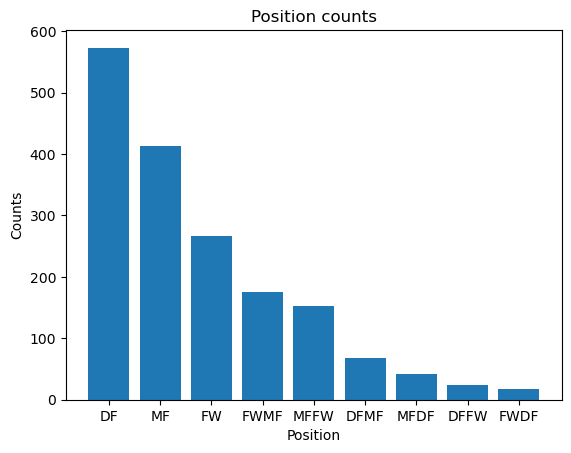

In [31]:
positions_counts = df_radar["Pos"].value_counts()
plt.bar(positions_counts.index, positions_counts.values)
plt.title("Position counts")
plt.xlabel("Position")
plt.ylabel("Counts")
plt.show()

Seems like in Europe top 5 leagues, most players are defenders

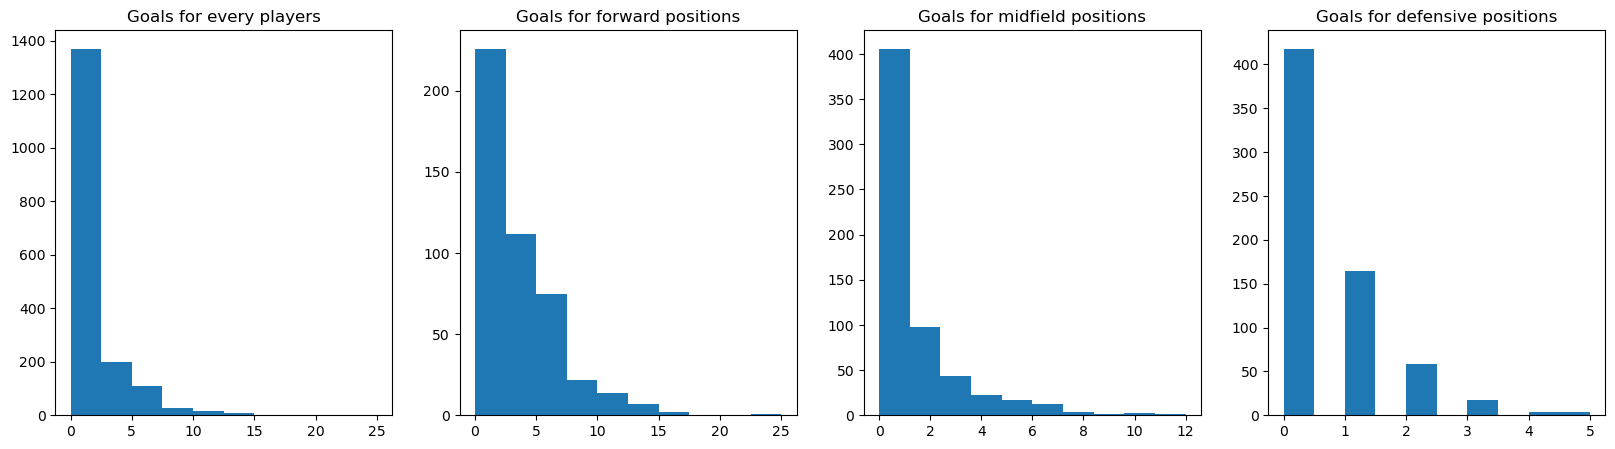

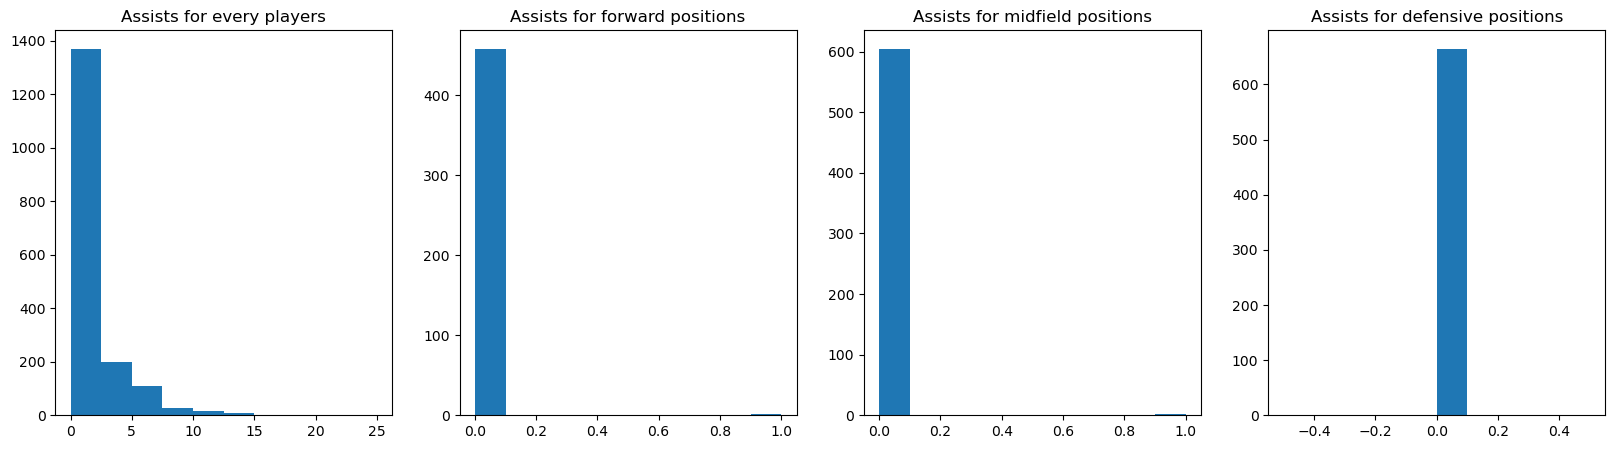

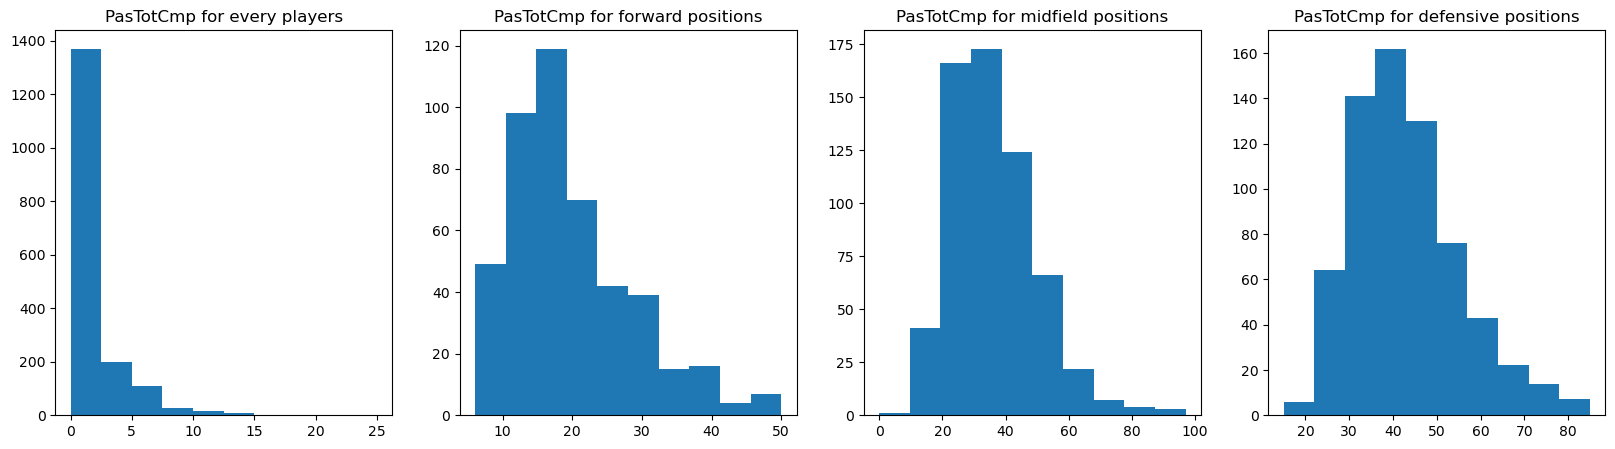

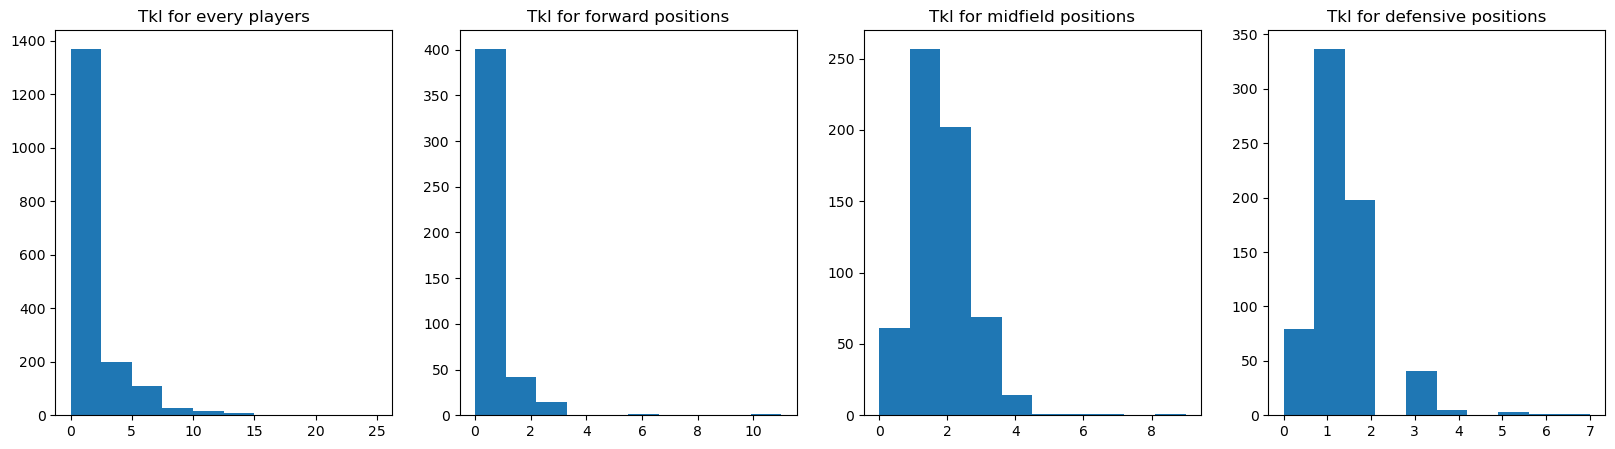

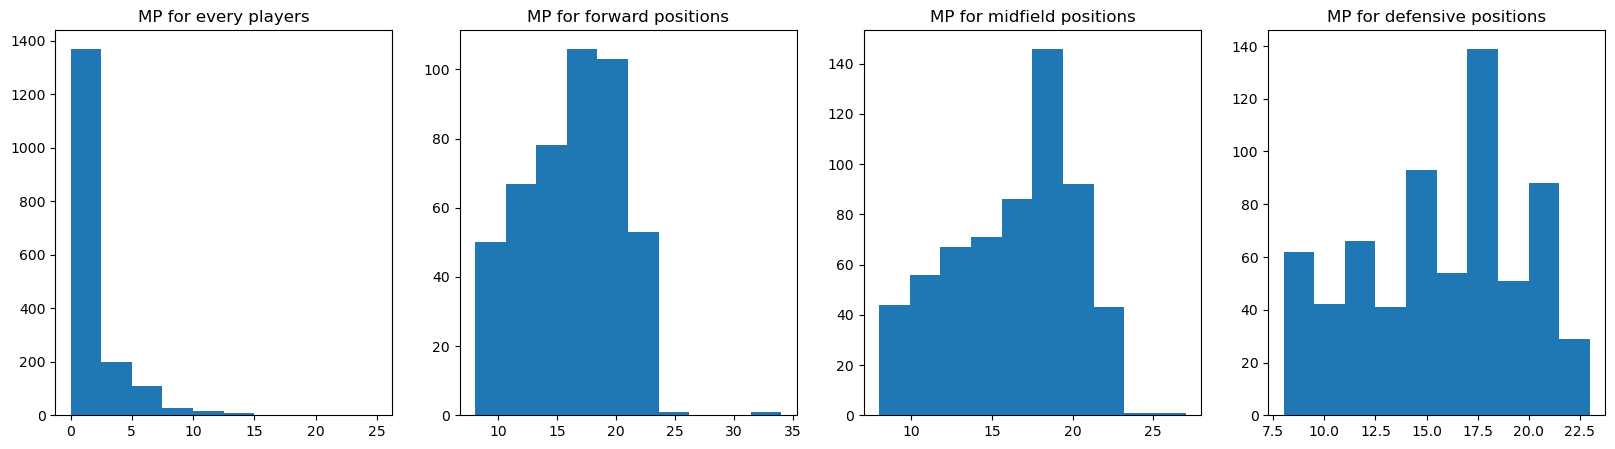

In [32]:
def single_feature_hist(feature):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

    axes[0].hist(df_players["Goals"])
    axes[0].set_title(feature + " for every players")
    axes[1].hist(df_players[(df_players["Pos"]=="FW") | (df_players["Pos"]=="FWMF") | (df_players["Pos"]=="FWDF")][feature].values)
    axes[1].set_title(feature + " for forward positions")
    axes[2].hist(df_players[(df_players["Pos"]=="MF") | (df_players["Pos"]=="MFFW") | (df_players["Pos"]=="MFDF")][feature].values)
    axes[2].set_title(feature + " for midfield positions")
    axes[3].hist(df_players[(df_players["Pos"]=="DF") | (df_players["Pos"]=="DFMF") | (df_players["Pos"]=="DFFW")][feature].values)
    axes[3].set_title(feature + " for defensive positions")
    plt.show()
single_feature_hist("Goals")
single_feature_hist("Assists")
single_feature_hist("PasTotCmp")
single_feature_hist("Tkl")
single_feature_hist("MP")

# Modeling

Now, we will proceed with the process of modeling where I will try different kind of models, features and evaluate them. First we try agglomerative complete linkage clustering.

In [33]:
np.random.seed(1)
N_CLUSTERS = 3
warnings.filterwarnings("ignore")
def ac_position(df, position, cluster, features, position_column):
    '''
    Train a Agglomerative model to cluster players at each position
    '''
    
    ac = AgglomerativeClustering(n_clusters=cluster, affinity='euclidean', linkage='complete')
    df_position = df[(df[position_column]==position)]
    position_pred = ac.fit_predict(df_position[features])
    df_position.loc[:, "Class"] = position_pred
    silhouette_avg = silhouette_score(df_position[features], position_pred)
    return df_position, silhouette_avg

def ac_general_position(df, general_position, cluster, features, position_column):
    '''
    Train a Agglomerative model to cluster players at each general position
    like striker, midfield, defender, or goalkeeper
    '''
    df_positions = []
    silhouette_avg_list = []

    for i in range(len(general_position)):
        df_position, silhouette_avg = ac_position(df, general_position[i], cluster, features, position_column)
        df_positions.append(df_position)
        silhouette_avg_list.append(silhouette_avg)
    return df_positions, silhouette_avg_list

In [34]:
df_striker, striker_silhouette_avg_list = ac_general_position(df_radar, forward_position, N_CLUSTERS, forward_features_reduced, "Pos")
df_midfield, midfield_silhouette_avg_list = ac_general_position(df_radar, midfield_position, N_CLUSTERS, midfielder_features_reduced, "Pos")
df_defender, defender_silhouette_avg_list = ac_general_position(df_radar, defender_position, N_CLUSTERS, defender_features_reduced, "Pos")
df_striker_pca, striker_silhouette_avg_list_pca = ac_general_position(df_radar_pca, forward_position, N_CLUSTERS, [0,1,2,3,4,5], "Pos")
df_midfield_pca, midfield_silhouette_avg_list_pca = ac_general_position(df_radar_pca, midfield_position, N_CLUSTERS, [0,1,2,3,4,5], "Pos")
df_defender_pca, defender_silhouette_avg_list_pca = ac_general_position(df_radar_pca, defender_position, N_CLUSTERS, [0,1,2,3,4,5], "Pos")

In [35]:
print(np.mean(striker_silhouette_avg_list))
print(np.mean(midfield_silhouette_avg_list))
print(np.mean(defender_silhouette_avg_list))
print(np.mean(striker_silhouette_avg_list_pca))
print(np.mean(midfield_silhouette_avg_list_pca))
print(np.mean(defender_silhouette_avg_list_pca))

0.3224615439713367
0.2774079624842133
0.21295459989452883
0.2670336175774338
0.31919828590219473
0.3010079338767369


In [36]:
df_striker, striker_silhouette_avg_list = ac_general_position(df_radar, ["FW"], N_CLUSTERS, forward_features_reduced, "Position Category")
df_midfield, midfield_silhouette_avg_list = ac_general_position(df_radar, ["MF"], N_CLUSTERS, midfielder_features_reduced, "Position Category")
df_defender, defender_silhouette_avg_list = ac_general_position(df_radar, ["DF"], N_CLUSTERS, defender_features_reduced, "Position Category")
df_striker_pca, striker_silhouette_avg_list_pca = ac_general_position(df_radar_pca, ["FW"], N_CLUSTERS, [0,1,2,3,4,5], "Position Category")
df_midfield_pca, midfield_silhouette_avg_list_pca = ac_general_position(df_radar_pca, ["MF"], N_CLUSTERS, [0,1,2,3,4,5], "Position Category")
df_defender_pca, defender_silhouette_avg_list_pca = ac_general_position(df_radar_pca, ["DF"], N_CLUSTERS, [0,1,2,3,4,5], "Position Category")

In [37]:
print(np.mean(striker_silhouette_avg_list))
print(np.mean(midfield_silhouette_avg_list))
print(np.mean(defender_silhouette_avg_list))
print(np.mean(striker_silhouette_avg_list_pca))
print(np.mean(midfield_silhouette_avg_list_pca))
print(np.mean(defender_silhouette_avg_list_pca))

0.39519831409687206
0.11323995937189368
0.17837802260238464
0.7087910060761482
0.42700290730268414
0.42003632015501213


In [38]:
df_striker_pca_concat = pd.concat(df_striker, axis=0)
df_midfield_pca_concat = pd.concat(df_midfield, axis=0)
df_defender_pca_concat = pd.concat(df_defender, axis=0)

KMeans clustering seperate positions

In [39]:
def plot_elbow(position_list, position_column, df):
    '''
    Plot elbow method
    '''
    for j in range(len(position_list)):
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
        for i in range(len(position_list[j])):
            distortions = []
            for n_clusters in range(1, 11):
                kmeans = KMeans(n_clusters=n_clusters, n_init=20, init='k-means++', random_state=1)
                features_list = []
                if position_list[j][i] in forward_position:
                    features_list = forward_features_reduced
                elif position_list[j][i] in midfield_position:
                    features_list = midfielder_features_reduced
                elif position_list[j][i] in defender_position:
                    features_list = defender_features_reduced
                kmeans.fit(df[df[position_column] == position_list[j][i]][features_list])
                distortions.append(kmeans.inertia_)

            axes[i].plot(range(1, 11), distortions, marker='o')
            axes[i].set_xlabel('Number of clusters')
            axes[i].set_ylabel('Distortion')
            axes[i].set_title('Position: ' + position_list[j][i])
            axes[i].grid(True)

    plt.tight_layout()
    plt.show()

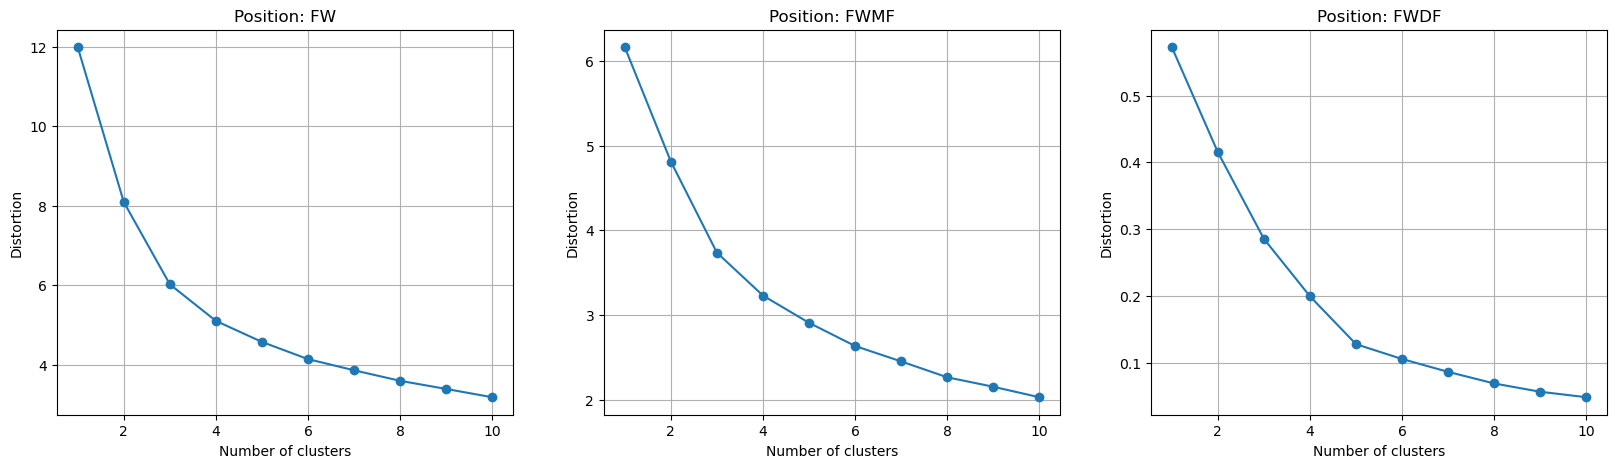

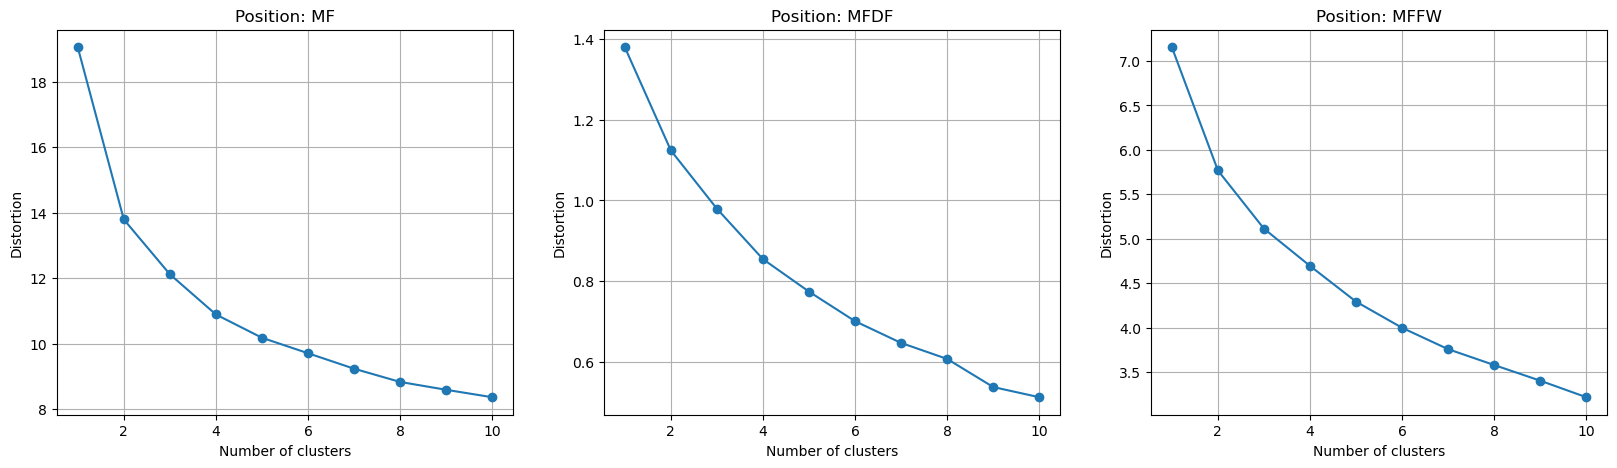

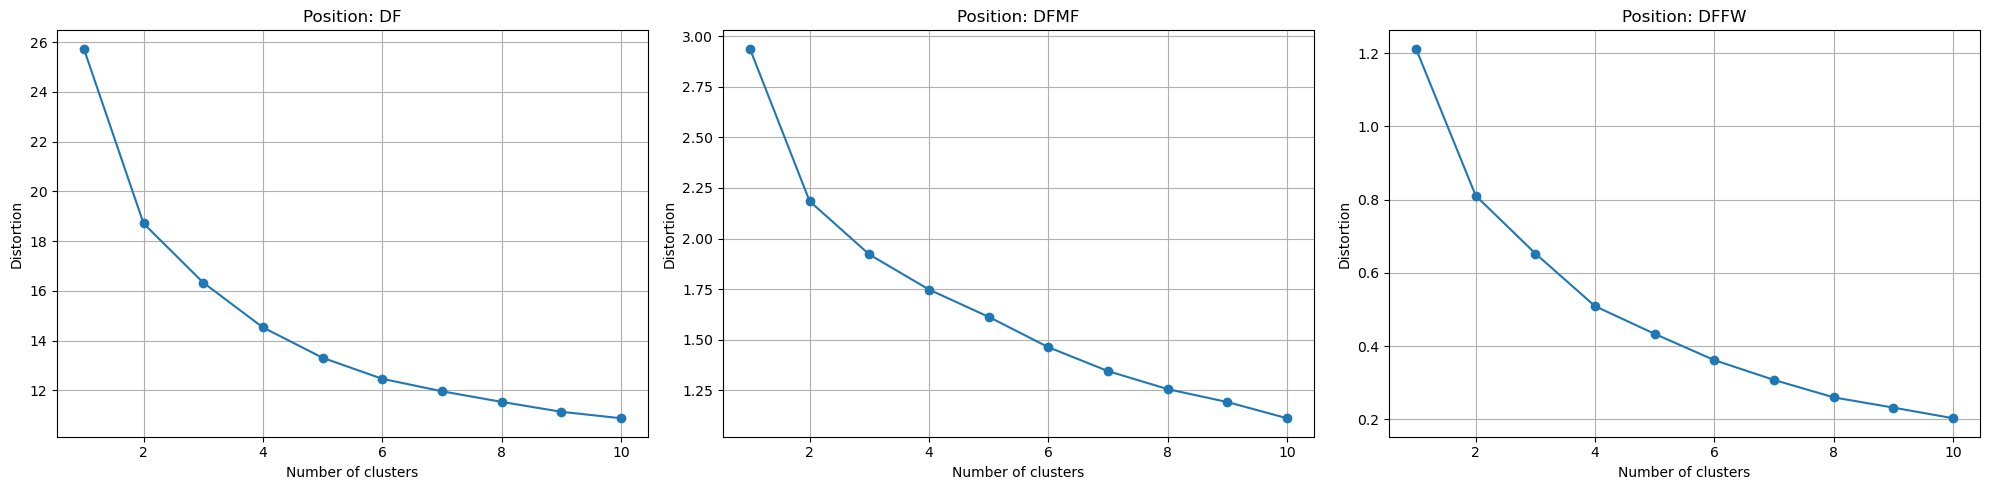

In [40]:
position_list = [forward_position, midfield_position, defender_position]
plot_elbow(position_list, "Pos", df_radar)

2 is too small for my liking so I pick 3

In [41]:
N_CLUSTERS = 3
def kmeans_position(df, position, cluster, features):
    '''
    Train a KMeans model to cluster players at each position
    '''
    kmeans = KMeans(n_clusters=cluster, init='k-means++', n_init=20, random_state=1)
    df_position = df[(df["Pos"]==position)]
    kmeans.fit(df_position[features])
    position_pred = kmeans.predict(df_position[features])
    df_position.loc[:, "Class"] = position_pred
    silhouette_avg = silhouette_score(df_position[features], position_pred)
    return df_position, silhouette_avg

def kmeans_general_position(df, general_position, cluster, features):
    '''
    Train a KMeans model to cluster players at each general position
    like striker, midfield, defender, or goalkeeper
    '''
    df_positions = []
    silhouette_avg_list = []
    for i in range(len(general_position)):
        df_position, silhouette_avg = kmeans_position(df, general_position[i], cluster, features)
        df_positions.append(df_position)
        silhouette_avg_list.append(silhouette_avg)
    return df_positions, silhouette_avg_list

df_striker, striker_silhouette_avg_list = kmeans_general_position(df_radar, forward_position, N_CLUSTERS, forward_features_reduced)
df_midfield, midfield_silhouette_avg_list = kmeans_general_position(df_radar, midfield_position, N_CLUSTERS, midfielder_features_reduced)
df_defender, defender_silhouette_avg_list = kmeans_general_position(df_radar, defender_position, N_CLUSTERS, defender_features_reduced)
df_striker_pca, striker_silhouette_avg_list_pca = kmeans_general_position(df_radar_pca, forward_position, N_CLUSTERS, [0,1,2,3,4,5])
df_midfield_pca, midfield_silhouette_avg_list_pca = kmeans_general_position(df_radar_pca, midfield_position, N_CLUSTERS, [0,1,2,3,4,5])
df_defender_pca, defender_silhouette_avg_list_pca = kmeans_general_position(df_radar_pca, defender_position, N_CLUSTERS, [0,1,2,3,4,5])

In [42]:
print(np.mean(striker_silhouette_avg_list))
print(np.mean(midfield_silhouette_avg_list))
print(np.mean(defender_silhouette_avg_list))
print(np.mean(striker_silhouette_avg_list_pca))
print(np.mean(midfield_silhouette_avg_list_pca))
print(np.mean(defender_silhouette_avg_list_pca))

0.30045889607915394
0.1602226648340884
0.2554703828228398
0.23493457813918747
0.20193627641426257
0.28339534050409687


KMeans clustering for position category

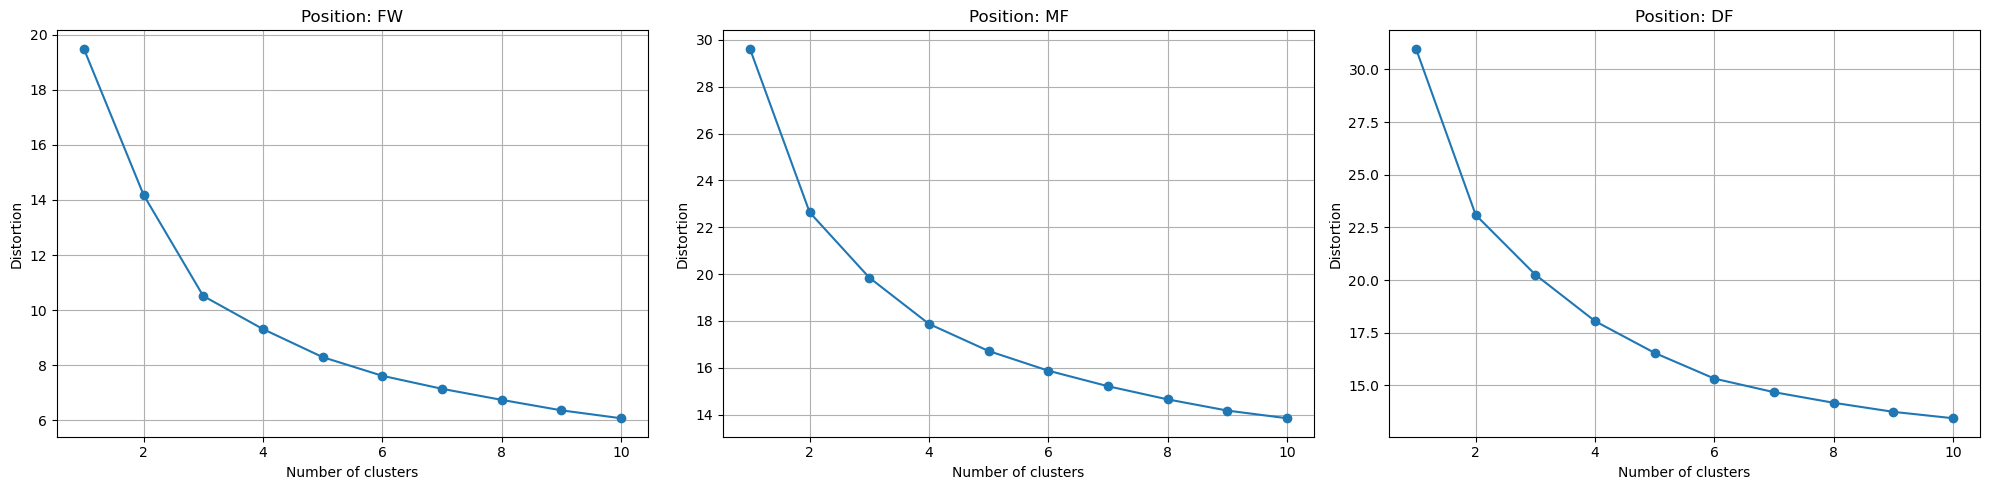

In [43]:
position_list = [["FW", "MF", "DF"]]
plot_elbow(position_list, "Position Category", df_radar)

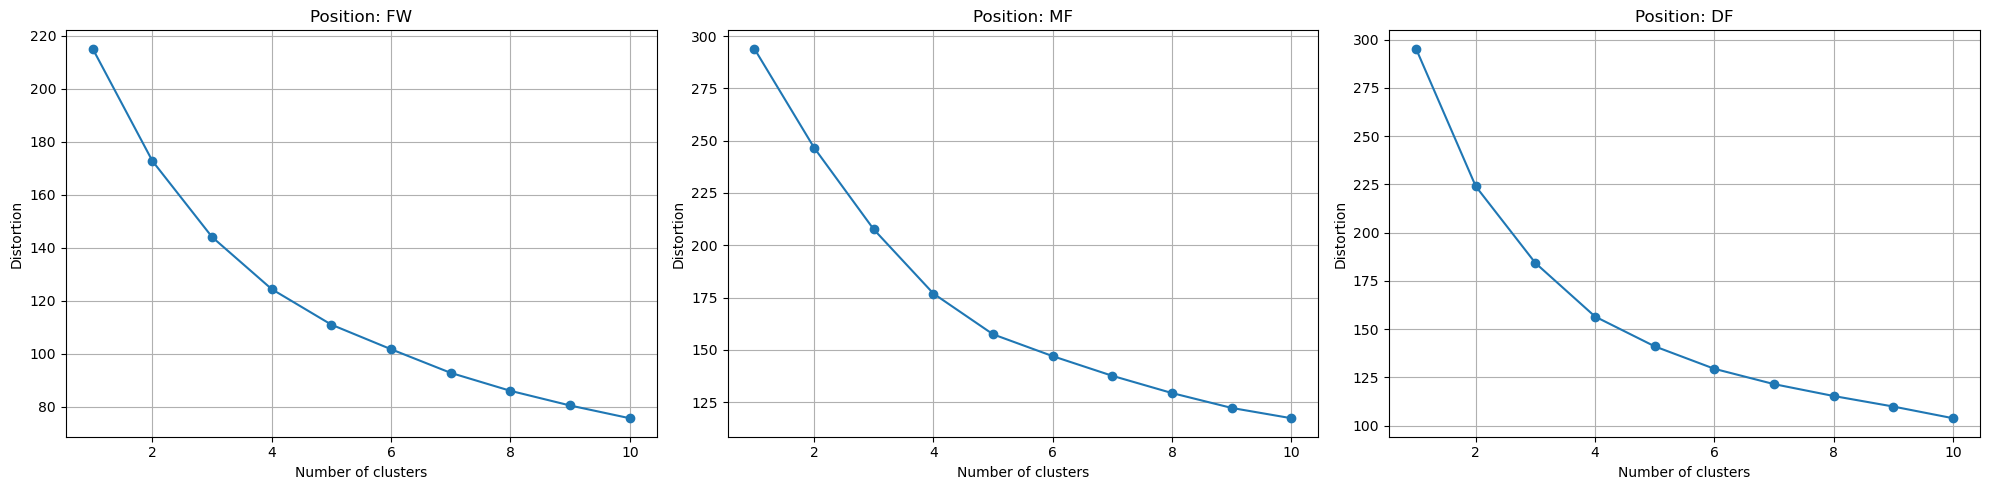

In [44]:
position_category = ["FW", "MF", "DF"]
features_list = [forward_features_reduced, midfielder_features_reduced, defender_features_reduced]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
for j in range(len(position_category)):
    distortions = []
    for n_clusters in range(1, 11):
        kmeans = KMeans(n_clusters=n_clusters, n_init=20, init='k-means++', random_state=1)
        kmeans.fit(df_radar_pca[df_radar_pca["Position Category"] == position_category[j]][[0,1,2,3,4,5]])
        distortions.append(kmeans.inertia_)

    axes[j].plot(range(1, 11), distortions, marker='o')
    axes[j].set_xlabel('Number of clusters')
    axes[j].set_ylabel('Distortion')
    axes[j].set_title('Position: ' + position_category[j])
    axes[j].grid(True)

plt.tight_layout()
plt.show()

In [45]:
N_CLUSTERS = 3
def kmeans_position(df, position, cluster, features):
    '''
    Train a KMeans model to cluster players at each position
    '''
    kmeans = KMeans(n_clusters=cluster, init='k-means++', n_init=20, random_state=1)
    df_position = df[(df["Position Category"]==position)]
    kmeans.fit(df_position[features])
    position_pred = kmeans.predict(df_position[features])
    df_position.loc[:, "Class"] = position_pred
    silhouette_avg = silhouette_score(df_position[features], position_pred)
    return df_position, silhouette_avg

def kmeans_position_category(df, position_list, cluster, features):
    '''
    Train a KMeans model to cluster players at each general position
    like striker, midfield, defender, or goalkeeper
    '''
    df_positions = []
    silhouette_avg_list = []
    for i in range(len(position_list)):
        df_position, silhouette_avg = kmeans_position(df, position_list[i], cluster, features)
        df_positions.append(df_position)
        silhouette_avg_list.append(silhouette_avg)
    return df_positions, silhouette_avg_list

df_striker, striker_silhouette_avg_list = kmeans_position_category(df_radar, ["FW"], N_CLUSTERS, forward_features_reduced)
df_midfield, midfield_silhouette_avg_list = kmeans_general_position(df_radar, ["MF"], N_CLUSTERS, midfielder_features_reduced)
df_defender, defender_silhouette_avg_list = kmeans_general_position(df_radar, ["DF"], N_CLUSTERS, defender_features_reduced)
df_striker_pca, striker_silhouette_avg_list_pca = kmeans_general_position(df_radar_pca, ["FW"], N_CLUSTERS, [0,1,2,3,4,5])
df_midfield_pca, midfield_silhouette_avg_list_pca = kmeans_general_position(df_radar_pca, ["MF"], N_CLUSTERS, [0,1,2,3,4,5])
df_defender_pca, defender_silhouette_avg_list_pca = kmeans_general_position(df_radar_pca, ["DF"], N_CLUSTERS, [0,1,2,3,4,5])

In [46]:
print(np.mean(striker_silhouette_avg_list))
print(np.mean(midfield_silhouette_avg_list))
print(np.mean(defender_silhouette_avg_list))
print(np.mean(striker_silhouette_avg_list_pca))
print(np.mean(midfield_silhouette_avg_list_pca))
print(np.mean(defender_silhouette_avg_list_pca))

0.29519732534184295
0.16246887438605334
0.16990953065227538
0.215787390014548
0.2098999106994072
0.300440921515487


From all these models, it seems like the agglomerative complete linkage model with position category, and df_radar_pca perform te best.

In [47]:
df_radar = pd.concat([df_striker_pca_concat, df_midfield_pca_concat, df_defender_pca_concat], axis=0)

In [48]:
df_outliers["Class"] = 3
df_outliers_radar["Class"] = 3

In [49]:
df_outliers.reset_index(inplace=True, drop=True)
df_players.reset_index(inplace=True, drop=True)
df_players = pd.concat([df_outliers, df_players], axis=0)
df_outliers_radar.reset_index(inplace=True, drop=True)
df_radar.reset_index(inplace=True, drop=True)
df_radar = pd.concat([df_outliers_radar, df_radar], axis=0)

We add the Class column to df_players

In [50]:
class_column = []
position_column = []
for i in range(df_players.shape[0]):
    class_column.append(df_radar[df_radar["Player"] == df_players.iloc[i,0]]["Class"].values[0])
    position_column.append(df_radar[df_radar["Player"] == df_players.iloc[i,0]]["Pos"].values[0])

In [51]:
df_players["Class"] = class_column
df_players["Pos"] = position_column

In [52]:
df_radar.reset_index(inplace=True, drop=True)
df_players.reset_index(inplace=True, drop=True)

In [53]:
del df_striker
del df_midfield
del df_defender
del df_striker_pca
del df_midfield_pca
del df_defender_pca
del df_striker_pca_concat
del df_midfield_pca_concat
del df_defender_pca_concat

In [54]:
df_players.to_csv("players.csv")

In [55]:
df_radar.to_csv("radar.csv")

# EDA 2

Separate positions

In [56]:
def plot_class(position, features, playing_time, max_value, df):
    for i in range(len(position)):
        fig, axes = plt.subplots(nrows=1, ncols=N_CLUSTERS + 1, figsize=(60,10))
        for j in range(N_CLUSTERS + 1):
            data = df[(df["Class"] == j) & (df["Pos"] == position[i])][features].mean()
            data_dict = dict(data)
            data = pd.DataFrame.from_dict(data_dict, orient='index', columns=['Mean Value'])
            axes[j].bar(data.index, data['Mean Value'])
            axes[j].set_xticks(range(len(data)))
            axes[j].set_xticklabels(data.index, rotation=90)
            axes[j].set_title(position[i] + " vs " + str(j))
            axes[j].set_yticks(np.arange(0, max_value + 0.1, 0.1))
            print("-")
            print(df[(df["Class"] == j) & (df["Pos"] == position[i])][playing_time].mean())
            print("Number of players: " + str(df[(df["Class"] == j) & (df["Pos"] == position[i])].shape[0]))
            print("-")
        plt.show()

In [57]:
# plot_class(forward_position,forward_features, playing_time, 1, df_radar)
# plot_class(midfield_position, midfielder_features_reduced, playing_time, 1, df_radar)
# plot_class(defender_position, defender_features, playing_time, 1, df_radar)

Position category

In [58]:
def plot_class(position, features, playing_time, max_value, df):
    for i in range(len(position)):
        fig, axes = plt.subplots(nrows=1, ncols=N_CLUSTERS + 1, figsize=(60,10))
        for j in range(N_CLUSTERS + 1):
            data = df[(df["Class"] == j) & (df["Position Category"] == position[i])][features].mean()
            data_dict = dict(data)
            data = pd.DataFrame.from_dict(data_dict, orient='index', columns=['Mean Value'])
            axes[j].bar(data.index, data['Mean Value'])
            axes[j].set_xticks(range(len(data)))
            axes[j].set_xticklabels(data.index, rotation=90)
            axes[j].set_title(position[i] + " vs " + str(j))
            axes[j].set_yticks(np.arange(0, max_value + 0.1, 0.1))
            print("-")
            print(df[(df["Class"] == j) & (df["Position Category"] == position[i])][playing_time].mean())
            print("Number of players: " + str(df[(df["Class"] == j) & (df["Position Category"] == position[i])].shape[0]))
            print("-")
        plt.show()

In [59]:
df_radar[(df_radar["Position Category"]=="DF") & (df_radar["Class"]==1)]["Player"]

1726            Faride Alidou
1780          Ismaëlben Boura
2139                Luca Netz
2254           Arnaud Souquet
2359    Ronaël Pierre-Gabriel
Name: Player, dtype: object

-
MP        0.310606
Starts    0.129310
Min       0.167274
dtype: float64
Number of players: 4
-
-
MP        0.566804
Starts    0.625392
Min       0.700439
dtype: float64
Number of players: 44
-
-
MP        0.448942
Starts    0.317980
Min       0.380627
dtype: float64
Number of players: 411
-
-
MP        0.070232
Starts    0.026775
Min       0.041696
dtype: float64
Number of players: 170
-


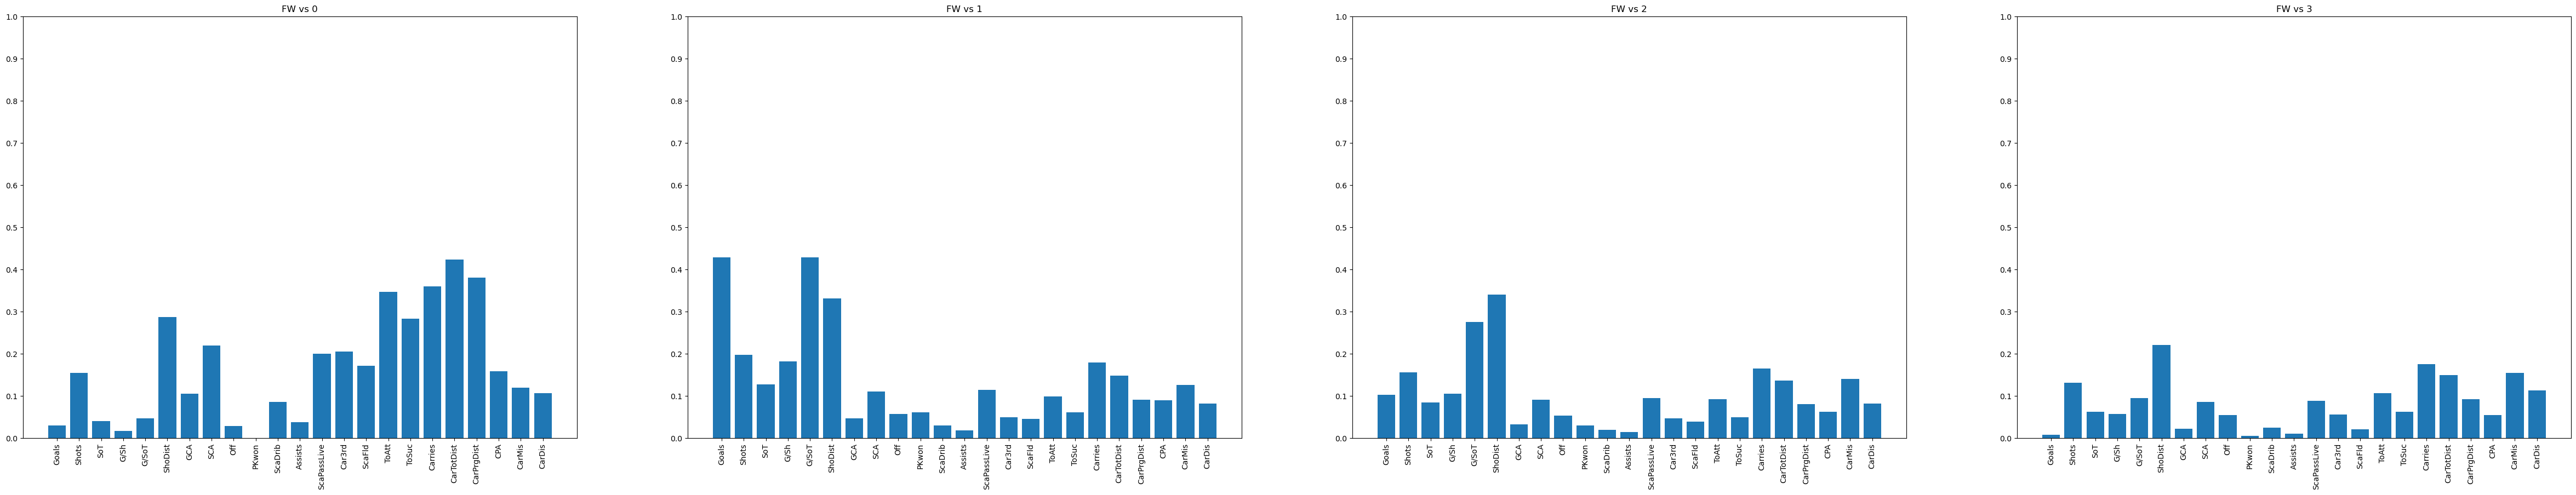

-
MP        0.415952
Starts    0.320917
Min       0.381116
dtype: float64
Number of players: 212
-
-
MP        0.458874
Starts    0.379310
Min       0.453963
dtype: float64
Number of players: 14
-
-
MP        0.485167
Starts    0.427369
Min       0.494107
dtype: float64
Number of players: 381
-
-
MP        0.067588
Starts    0.028126
Min       0.042773
dtype: float64
Number of players: 217
-


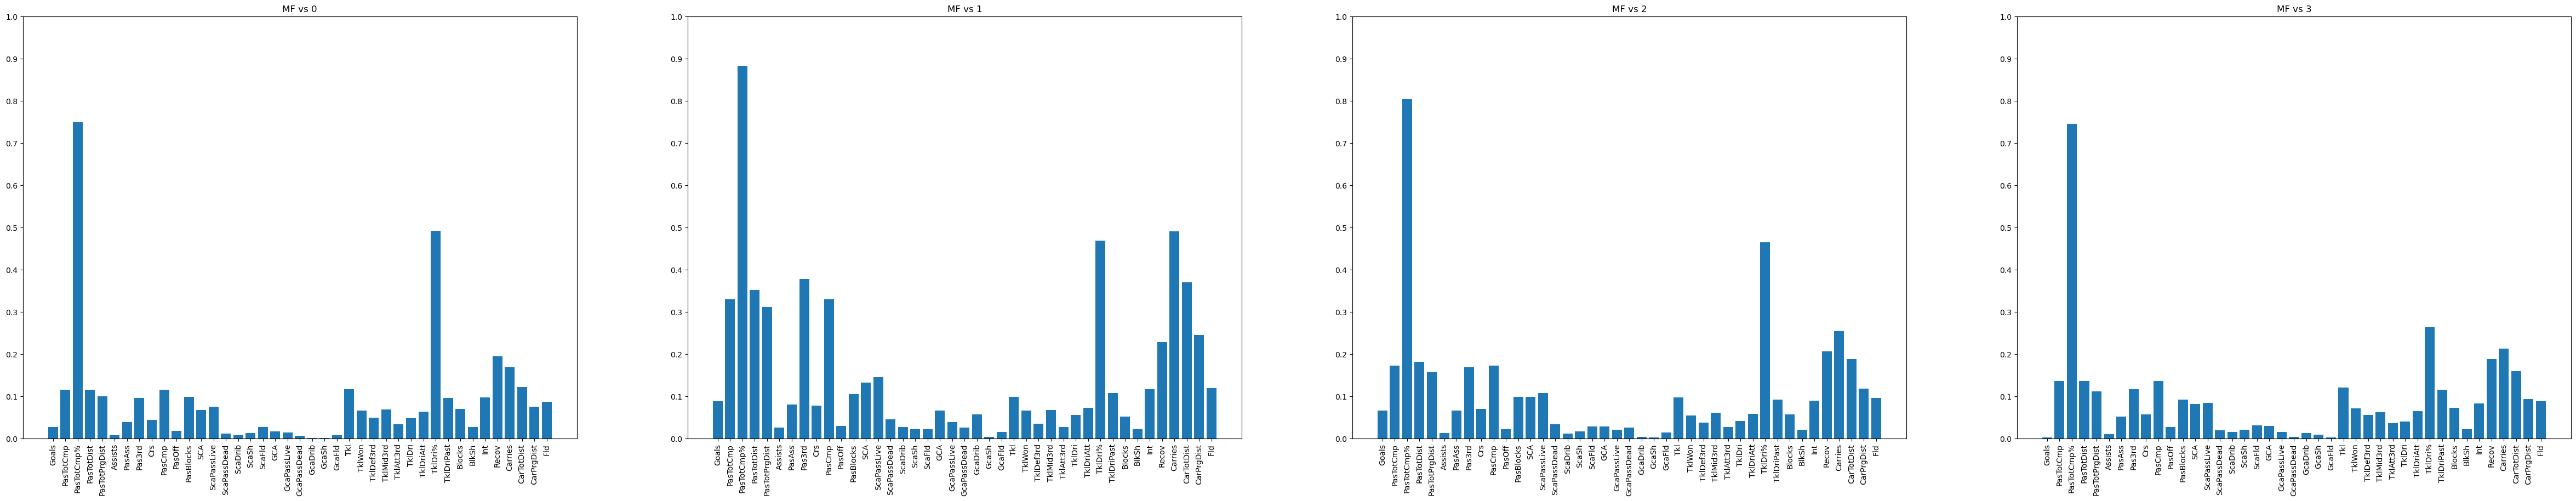

-
MP        0.426957
Starts    0.422962
Min       0.495179
dtype: float64
Number of players: 346
-
-
MP        0.290909
Starts    0.082759
Min       0.128630
dtype: float64
Number of players: 5
-
-
MP        0.453773
Starts    0.463870
Min       0.547134
dtype: float64
Number of players: 314
-
-
MP        0.081207
Starts    0.065286
Min       0.084247
dtype: float64
Number of players: 253
-


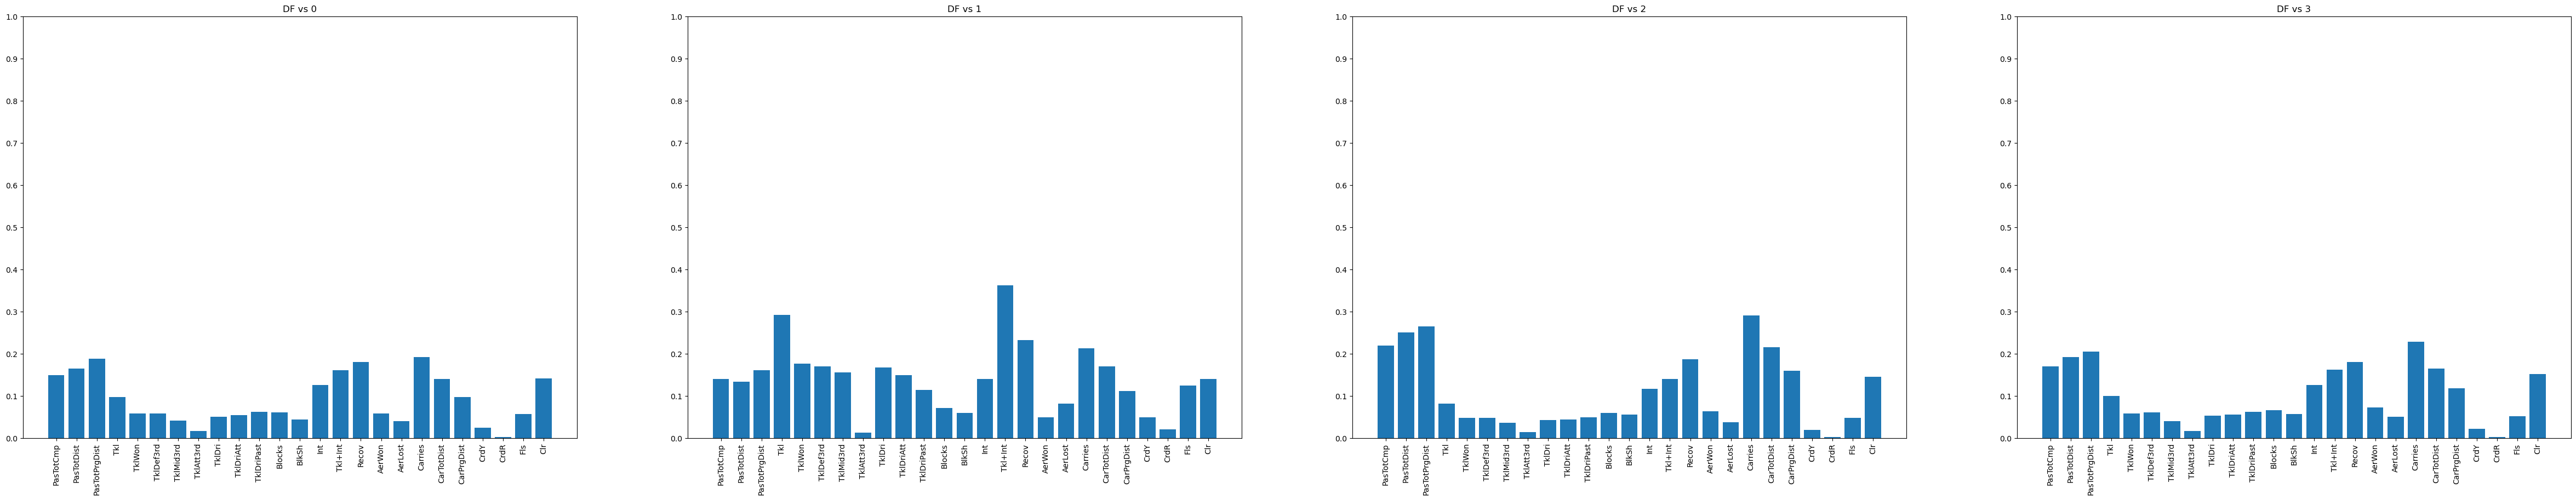

In [60]:
plot_class(["FW"], forward_features, playing_time, 1, df_radar)
plot_class(["MF"], midfielder_features, playing_time, 1, df_radar)
plot_class(["DF"], defender_features, playing_time, 1, df_radar)

In [61]:
forward_category = ["Ball carrier", "Goal scorer", "Well rounded", "Injury prone / Sub"]
midfield_category = ["Defensive-minded midfielder", "Attacking/Ball carrying midfielder", "Dynamic midfielder", "Injury prone / Sub"]
defend_category = ["Well rounded defender", "Aggressive defender", "Ball-playing defender", "Injury prone / Sub"]

In [62]:
color_ranking = ["steelblue", "green", "gold", "red"]

# Plotting

In [63]:
df_players["Position Category"]

0       MF
1       DF
2       FW
3       MF
4       MF
        ..
2366    MF
2367    FW
2368    DF
2369    DF
2370    DF
Name: Position Category, Length: 2371, dtype: object

In [64]:
def get_info(player_name, attribute, df):
    '''
    Get information attribute given the player name and a list of attributes
    '''
    if player_name not in all_players:
        return "No player found"
    
    color = list(df[df["Player"] == player_name]["Class"].values)[0]
    return df[df["Player"] == player_name][attribute], color


def attribute_description(attribute):
    '''
    Get the description of each attribute inside the list
    '''
    description = []
    for i in range(len(attribute)):
        description.append(acronyms[attribute[i]])
    return description

def plot_players_right(player_name, attribute, df):
    '''
    Plot the player attribute given the player name, attribute, and desired year
    '''
    
    if player_name not in all_players:
        return "No player found"

    player, color = get_info(player_name, attribute, df)
    description = attribute_description(attribute)
    
    fig = go.Figure(go.Bar(
            x=player.values[0],
            y=description,
            orientation='h',
            marker=dict(
            color=color_ranking[color],
            line=dict(color='black', width=0.5)
        )))
    
    fig.update_layout(
        yaxis_title="Features",
        xaxis=dict(side='top'),
        plot_bgcolor='rgba(0,0,0,0)',
        bargap=0.2
    )
    
    fig.show()
    
def plot_players_left(player_name, attribute, df):
    '''
    Plot the player attribute given the player name, attribute, and desired year
    '''
    
    if player_name not in all_players:
        return "No player found"
    
    player, color = get_info(player_name, attribute, df)
    description = attribute_description(attribute)
    
    fig = go.Figure(go.Bar(
            x=player.values[0],
            y=description,
            orientation='h',
            marker=dict(
            color=color_ranking[color],
            line=dict(color='black', width=0.5)
        )))

    fig.update_layout(
        xaxis = dict(side='top', range=[max(player.values[0]), 0]),
        yaxis = dict(side='right'),
        plot_bgcolor='rgba(0,0,0,0)',
        bargap=0.2,)

    fig.show()

def plot_radar(player_name,df):
    '''
    Plot radar chart
    '''
    
    if player_name not in all_players:
        return "No player found"
    
    player_info, color = get_info(player_name, goals_bestfeatures + passes_bestfeatures + skill_bestfeatures + defense_bestfeatures, df)
    
    new_column = attribute_description(player_info.columns)
    player_info.columns = new_column
    
    fig = px.line_polar(player_info, r=list(player_info.values[0]), theta=list(player_info.columns), line_close=True)
    fig.update_layout(polar=dict(radialaxis=dict(range=[0, 1], showticklabels=False)), plot_bgcolor='white')
    fig.update_traces(fill='toself', fillcolor=color_ranking[color], line_color='black', opacity=0.8)
    fig.show()

In [65]:
plot_players_right("Cristiano Ronaldo", forward_features, df_players)

In [66]:
plot_radar("Kylian Mbappé", df_radar)

In [67]:
plot_players_left("Erling Haaland", forward_features, df_players)

In [68]:
plot_radar("Erling Haaland", df_radar)

# Similar player profile

In [69]:
def similar_players(player_name, attribute, df):
    player_info, color = get_info(player_name, attribute + ["Player", "Position Category"], df)
    df_train = df[df["Position Category"]==get_info(player_name, ["Position Category"], df_radar)[0]["Position Category"].values[0]]
    
    cosine_matrix = pd.DataFrame(cosine_similarity(df_train[attribute]))
    cosine_matrix.reset_index(inplace=True, drop=True)
    df_train.reset_index(inplace=True, drop=True)
    df_full = pd.concat([df_train["Player"], cosine_matrix], axis=1)
    
    player_name_list = list(df_full["Player"].values)
    player_coef = list(df_full[df_full["Player"]==player_name].values[0])[1:]
    player_sorted = sorted(zip(player_name_list, player_coef), key=lambda x: x[1], reverse=True)
    players = [x[0] for x in player_sorted]
    
    return players

In [70]:
similar_players("Lionel Messi", playing_time + forward_features + midfielder_features + defender_features, df_radar)

['Lionel Messi',
 'Neymar',
 'Leroy Sané',
 'Rémy Cabella',
 'Seko Fofana',
 'Florian Sotoca',
 'Téji Savanier',
 'Muhammed Saracevic Cham',
 'Kevin De Bruyne',
 'David Pereira da Costa',
 'Luka Modri?',
 'Paulo Dybala',
 'Jamal Musiala',
 'Piotr Zieli?ski',
 'James Maddison',
 'Bernardo Silva',
 'Pedri',
 'Benjamin Bourigeaud',
 'Ludovic Blas',
 'Martin Ødegaard',
 'Frenkie de Jong',
 'Rony Lopes',
 'Flavien Tait',
 'Dominik Szoboszlai',
 'Aleksandr Golovin',
 'Branco van den Boomen',
 'Matteo Pessina',
 'Enzo Le Fée',
 'Youcef Belaïli',
 'Jordan Veretout',
 'Angel Gomes',
 'Nicolò Barella',
 'Mattéo Guendouzi',
 'Teun Koopmeiners',
 'Gianluca Caprari',
 'Jude Bellingham',
 'Jean-Ricner Bellegarde',
 'Florian Kainz',
 'Ýlkay Gündoðan',
 'Carlos Soler',
 'Harvey Elliott',
 'Julian Brandt',
 'Lucas Paquetá',
 'Andrej Kramari?',
 'Aleksei Miranchuk',
 'Brais Méndez',
 'William Carvalho',
 'Sergej Milinkovi?-Savi?',
 'Gabriel Veiga',
 'Luis Alberto',
 'Ruslan Malinovskyi',
 'Andre-Frank Z

# AI Analysis

In [71]:
openai.api_key = "KEY"

In [72]:
def player_to_text(player1, player2, attribute):
    player1_text = ""
    player2_text = ""
    for i in range(len(list(df_players[general_info + attribute].columns))):
        player1_text += str(list(df_players[df_players["Player"] == player1][general_info + attribute].columns)[i]) + ": "
        player1_text += str(df_players[df_players["Player"] == player1][general_info + attribute].values[0][i]) + ", "
        player1_text += str(list(df_players[df_players["Player"] == player2][general_info + attribute].columns)[i]) + ": "
        player1_text += str(df_players[df_players["Player"] == player2][general_info + attribute].values[0][i]) + ", "
    return player1_text, player2_text

def compare_stats_between_examples(player1, player2):
    prompt = f"Write an analysis about some of the main given attributes between the following two football players:\n1. {player1}\n2. {player2}\n"
    response = openai.Completion.create(
        engine="text-davinci-002",
        prompt=prompt,
        max_tokens=1500
    )

    return response